In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from ipywidgets import interact
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
os.chdir("C:\\Users\\Sevak\\Desktop\\Analysis-of-Real-Estate-Markets-of-Armenia-main\\data")
os.listdir()

['cleaned_data.csv', 'encoded_data.csv', 'raw_data.csv']

In [5]:
data = pd.read_csv('cleaned_data.csv')
data.head(10)

,District,Building Type,Rooms,Area,Floor,Renovation,Price
0,Շենգավիթ,Քարե,3,50,1,Կապիտալ,64000.0
1,Արաբկիր,"Մոնոլիտ, Նորակառույց",2,70,3,Զրոյական վիճակ,150000.0
2,Մալաթիա Սեբաստիա,Պանելային,3,100,7,Պետական վիճակ,115000.0
3,Մալաթիա Սեբաստիա,Պանելային,1,45,1,Կապիտալ,67000.0
4,Քանաքեռ Զեյթուն,Կասետային,2,52,4,Նորմալ վիճակ,68000.0
5,Մալաթիա Սեբաստիա,Պանելային,1,45,2,Նորմալ վիճակ,62000.0
6,Կենտրոն,Պանելային,3,80,9,Նորմալ վիճակ,168000.0
7,Կենտրոն,Քարե,1,31,4,Պետական վիճակ,80000.0
8,Կենտրոն,Քարե,3,77,4,Նորմալ վիճակ,163000.0
9,Աջափնյակ,Քարե,2,48,4,Պետական վիճակ,66000.0


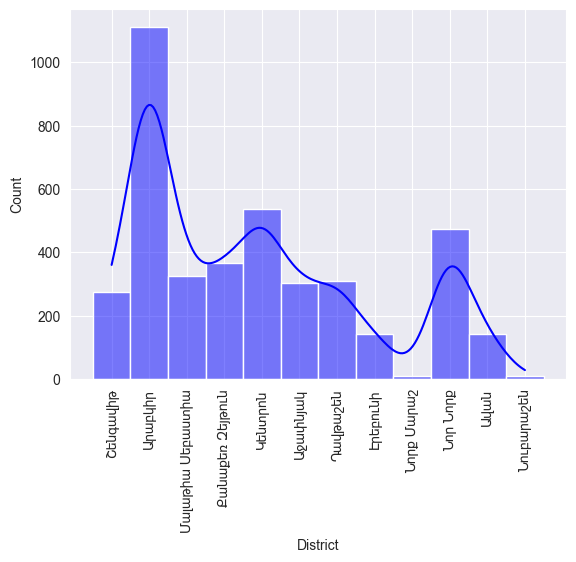

In [35]:
def plot_distinct(bins=10):
    sns.histplot(data["District"], bins=bins, kde=True, color="blue")
    plt.xticks(rotation=90)
    plt.show()
plot_distinct()


##  Conclusion

The graph shows the **distribution of listings across districts**. It is evident that certain districts, particularly **Kentron and Arabkir, have the highest concentration of listings**, indicating higher market activity in these areas. In contrast, districts like **Nubarashen, Nor Nork, and Erebuni have significantly fewer listings**, suggesting lower availability or market activity there. This distribution insight is valuable for understanding **demand and supply dynamics** across districts and can guide **localized price analysis or investment focus** in high-activity areas.

---


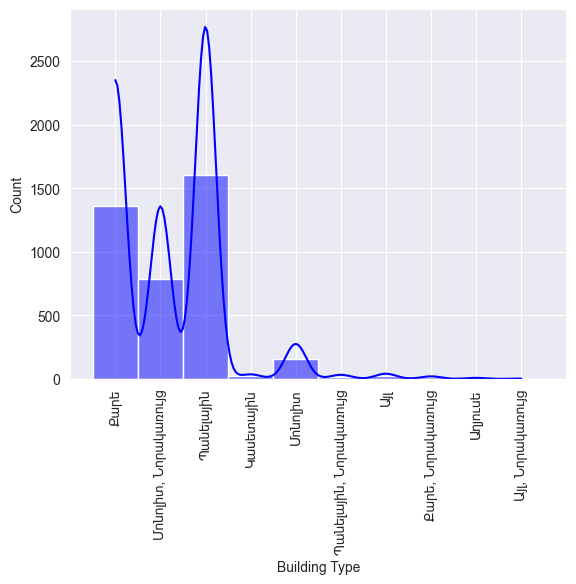

In [36]:
def plot_hist(bins=10):
    sns.histplot(data["Building Type"], bins=bins, kde=True, color="blue")
    plt.xticks(rotation=90)
    plt.show()
plot_hist()



# Conclusion

The real estate market in this dataset is largely composed of **Stone**, **Panel**, and **Monolith (Newly Built)** buildings. Other types are either niche or underrepresented. This insight is crucial for pricing strategies, market segmentation, or construction planning.

---

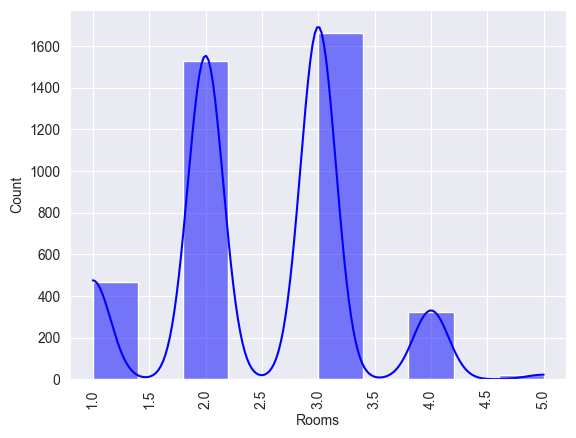

In [37]:
def plot_hist(bins=10):
    sns.histplot(data["Rooms"], bins=bins, kde=True, color="blue")
    plt.xticks(rotation=90)
    plt.show()
plot_hist()


##  Conclusion for `Rooms` Distribution

The chart shows the distribution of listings based on the **number of rooms**.

###  Key Points:

* **2-room and 3-room apartments** are the most common, with 3-room units being slightly more frequent.
* **1-room and 4-room units** exist but are significantly fewer.
* Apartments with **more than 4 rooms** are rare in the dataset.

###  Summary:

The real estate market is heavily focused on **2- and 3-room apartments**, likely reflecting the most in-demand or standard housing size.

---

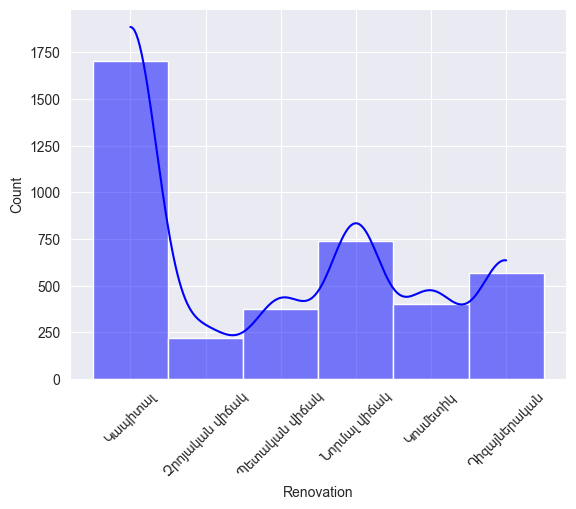

In [38]:
def plot_hist():
    sns.histplot(data["Renovation"], kde=True, color="blue",)
    plt.xticks(rotation=45)
    plt.show()
plot_hist()


# Renovation Status Distribution – Conclusion
The majority of listings are without renovation (Կապիտալ), making up the largest portion of the dataset. Other categories also appear frequently, while Zero Condition (Զրոյական վիճակ) are less common. This suggests that buyers are mostly offered properties that are already in livable or fully renovated conditions.

---

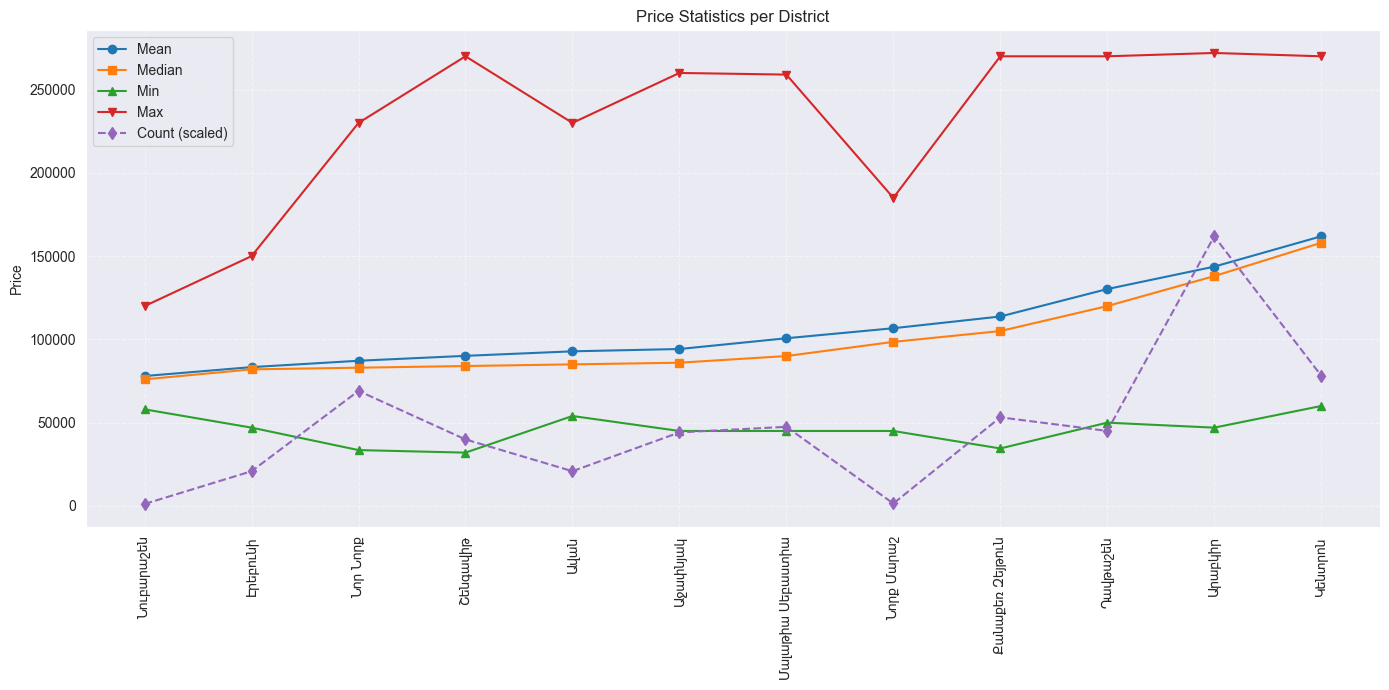

In [39]:
grouped = data.groupby("District")["Price"].agg(["count", "mean", "median", "min", "max"])
grouped_reset = grouped.reset_index()

grouped_reset = grouped_reset.sort_values("mean")

# Extract x and y data
x = grouped_reset["District"]

mean = grouped_reset["mean"]
median = grouped_reset["median"]
min_price = grouped_reset["min"]
max_price = grouped_reset["max"]
count_scaled = grouped_reset["count"] * (mean.max() / grouped_reset["count"].max())  # scaled for visibility

# Plot
plt.figure(figsize=(14, 7))

plt.plot(x, mean, label="Mean", marker="o")
plt.plot(x, median, label="Median", marker="s")
plt.plot(x, min_price, label="Min", marker="^")
plt.plot(x, max_price, label="Max", marker="v")
plt.plot(x, count_scaled, label="Count (scaled)", linestyle="--", marker="d")

plt.xticks(rotation=90)
plt.ylabel("Price")
plt.title("Price Statistics per District")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# Conclusion:
Property prices in Yerevan are highest in central districts, with clear differences across areas. Central zones have higher mean and median prices and more listings, highlighting location’s strong impact on real estate values.

---

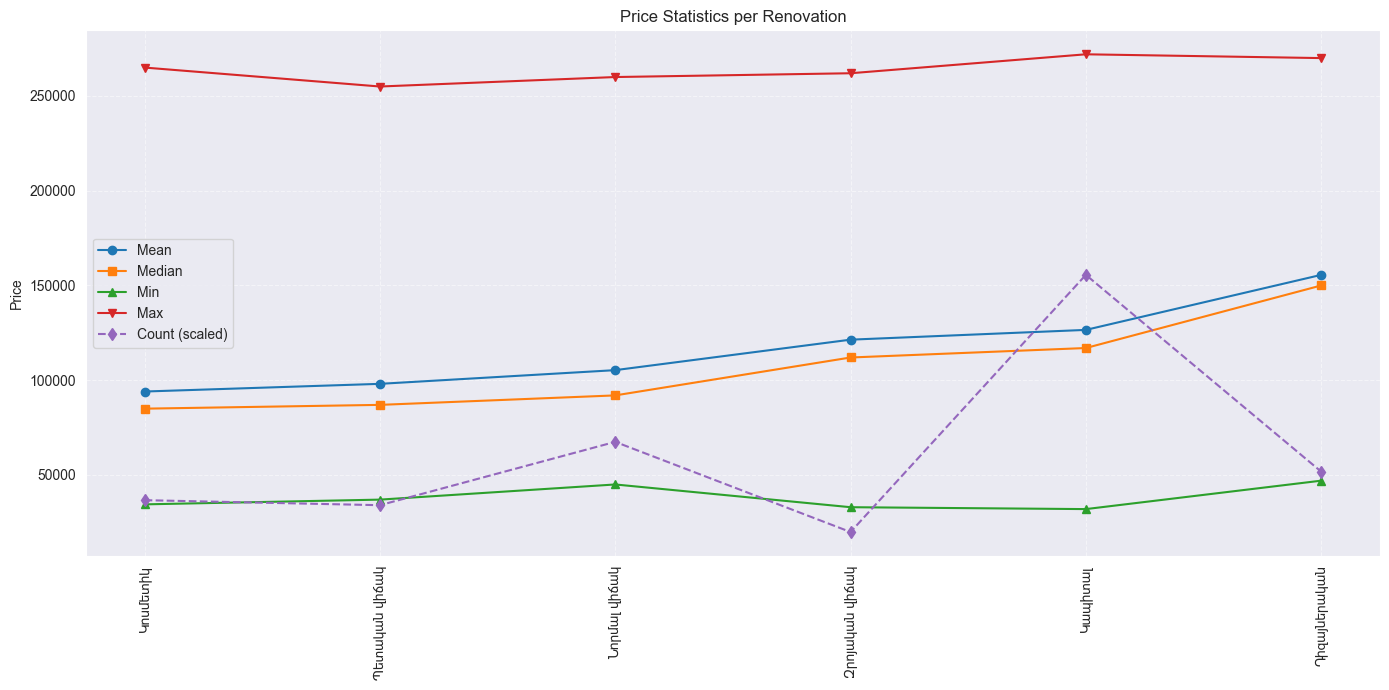

In [40]:
grouped = data.groupby("Renovation")["Price"].agg(["count", "mean", "median", "min", "max"])
grouped_reset = grouped.reset_index()

grouped_reset = grouped_reset.sort_values("mean")

# Extract x and y data
x = grouped_reset["Renovation"]

mean = grouped_reset["mean"]
median = grouped_reset["median"]
min_price = grouped_reset["min"]
max_price = grouped_reset["max"]
count_scaled = grouped_reset["count"] * (mean.max() / grouped_reset["count"].max())  # scaled for visibility

# Plot
plt.figure(figsize=(14, 7))

plt.plot(x, mean, label="Mean", marker="o")
plt.plot(x, median, label="Median", marker="s")
plt.plot(x, min_price, label="Min", marker="^")
plt.plot(x, max_price, label="Max", marker="v")
plt.plot(x, count_scaled, label="Count (scaled)", linestyle="--", marker="d")

plt.xticks(rotation=90)
plt.ylabel("Price")
plt.title("Price Statistics per Renovation")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# Conclusion:
Apartments with better renovation generally have higher average and median prices. Listings with new or major renovations attract higher prices, showing renovation quality’s strong influence on property value in Yerevan.

---

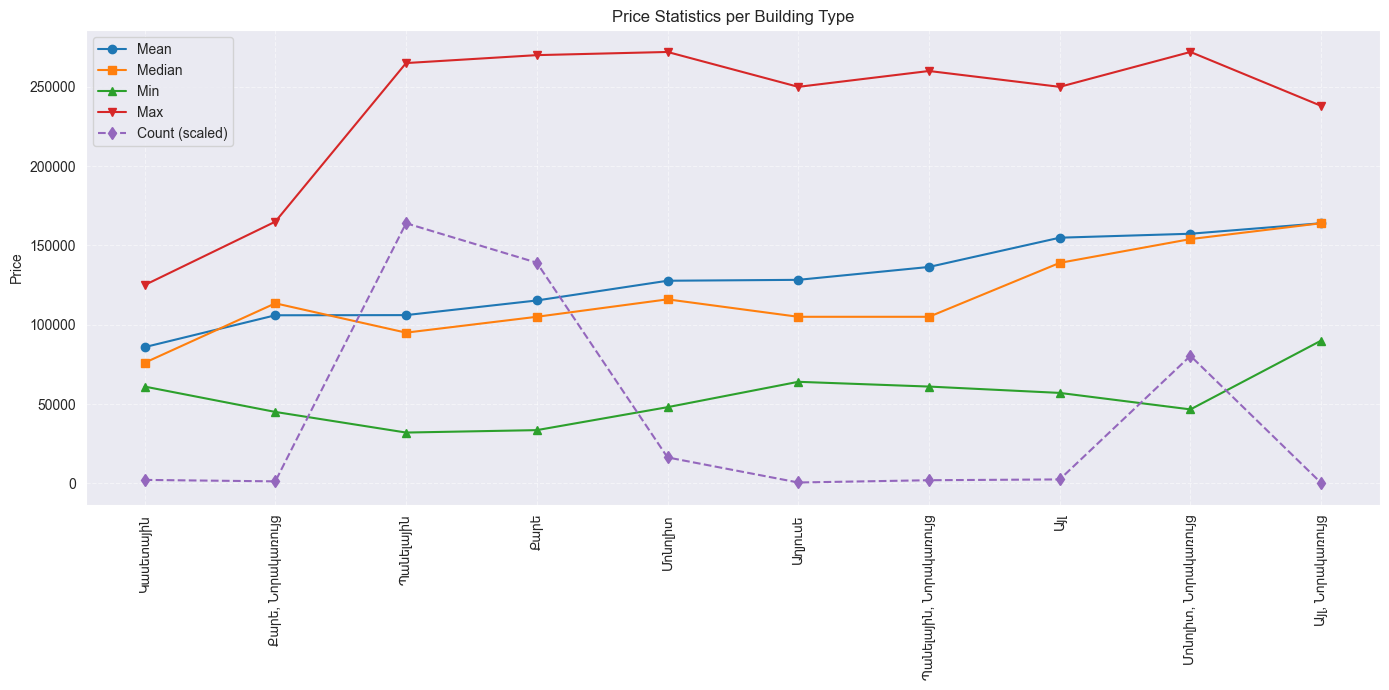

In [41]:
grouped = data.groupby("Building Type")["Price"].agg(["count", "mean", "median", "min", "max"])
grouped_reset = grouped.reset_index()

grouped_reset = grouped_reset.sort_values("mean")

# Extract x and y data
x = grouped_reset["Building Type"]

mean = grouped_reset["mean"]
median = grouped_reset["median"]
min_price = grouped_reset["min"]
max_price = grouped_reset["max"]
count_scaled = grouped_reset["count"] * (mean.max() / grouped_reset["count"].max())  # scaled for visibility

# Plot
plt.figure(figsize=(14, 7))

plt.plot(x, mean, label="Mean", marker="o")
plt.plot(x, median, label="Median", marker="s")
plt.plot(x, min_price, label="Min", marker="^")
plt.plot(x, max_price, label="Max", marker="v")
plt.plot(x, count_scaled, label="Count (scaled)", linestyle="--", marker="d")

plt.xticks(rotation=90)
plt.ylabel("Price")
plt.title("Price Statistics per Building Type")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# Conclusion:
Building type strongly impacts prices, with newer and monolithic constructions showing higher mean and median values. This highlights buyer preference for modern building types in Yerevan’s real estate market.

---



In [42]:
label_encoder = LabelEncoder()

encoded_data = data.copy()
for column in encoded_data.select_dtypes(include=['object']).columns:
   encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

encoded_data.head()

,District,Building Type,Rooms,Area,Floor,Renovation,Price
0,10,8,3,50,1,2,64000.0
1,2,5,2,70,3,1,150000.0
2,6,6,3,100,7,5,115000.0
3,6,6,1,45,1,2,67000.0
4,11,3,2,52,4,4,68000.0


In [65]:
encoded_data.to_csv(r"C:\\Users\\Sevak\\Desktop\\Analysis-of-Real-Estate-Markets-of-Armenia-main\\Data\\encoded_data.csv", index=False)

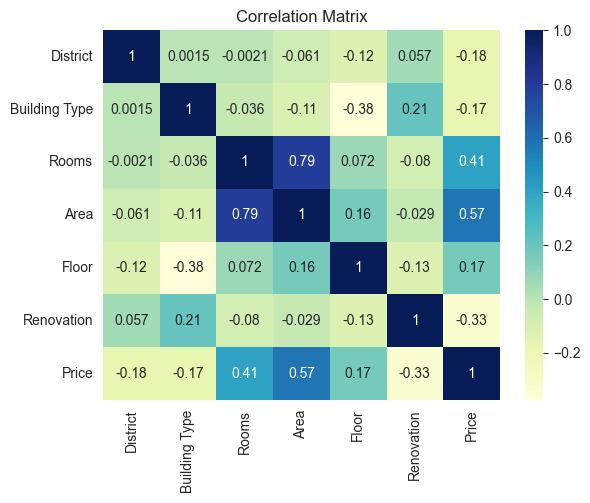

In [57]:
corr_matrix = encoded_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

##  Conclusion

The correlation matrix reveals that **`Area` (0.57) and `Rooms` (0.41) have the strongest positive correlations with `Price`,** indicating they are key drivers of property prices in this dataset. `Renovation` also shows a moderate negative correlation (-0.33), suggesting properties with higher renovation codes may be associated with lower prices, depending on how renovation is encoded. Other features, including `District`, `Building Type`, and `Floor`, exhibit weak correlations with `Price`, implying a limited direct influence on price prediction. Additionally, the high correlation between `Area` and `Rooms` (0.79) should be considered for multicollinearity when building predictive models.

---

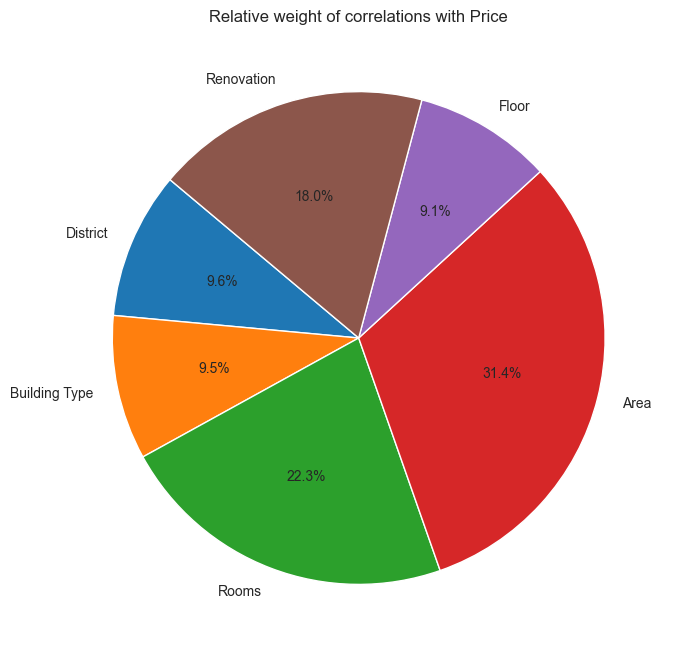

In [56]:
correlations = corr_matrix["Price"].drop("Price").abs()
plt.figure(figsize=(8, 8))
plt.pie(
    correlations,
    labels=correlations.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Relative weight of correlations with Price")
plt.show()


# Conclusion
The pie chart displays the relative weight of absolute correlations of each feature with **Price** indicating which features are most strongly associated with **Price** in dataset.
The percentages represent each feature’s share in the total correlation strength with **Price**.

**$Area > Rooms > Renovation$** are the most important drivers of **price** in dataset.
This prioritization will help in feature selection and model tuning for **price prediction**.